可以在[Bookshop.org](https://bookshop.org/a/98697/9781098155438) 和
[Amazon](https://www.amazon.com/_/dp/1098155432?smid=ATVPDKIKX0DER&_encoding=UTF8&tag=oreilly20-20&_encoding=UTF8&tag=greenteapre01-20&linkCode=ur2&linkId=e2a529f94920295d27ec8a06e757dc7c&camp=1789&creative=9325)获取纸制版和电子版的*Think Python 3e*.

In [1]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + str(local))
    return filename

download('https://gitee.com/regentsai/Think_Python_3e_CN/blob/master/thinkpython.py');
download('https://gitee.com/regentsai/Think_Python_3e_CN/blob/master/diagram.py');
download('https://gitee.com/regentsai/Think_Python_3e_CN/blob/master/jupyturtle.py');

import thinkpython

# 第5章:条件和递归

本章的话题主要是`if`语句，它根据程序的状态执行不同的代码。有了`if`语句，我们将能够探索计算中最强大的概念：**递归recursion**。

但是我们会以3个新功能开始本章的内容：求模运算符，布尔表达式，以及逻辑运算符。

## 整数除法和求模

回忆一下整数除法运算符`//`，将两个数字相除，然后向下取整。例如，假设一部电影的时长为105分钟，你可能想要知道对应是多少小时。

常规的除法返回浮点数：

In [2]:
minutes = 105
minutes / 60

1.75

但我们通常不会用小数来描述小时数。整数除法则对结果向下取整：

In [3]:
minutes = 105
hours = minutes // 60
hours

1

要计算余数，你可以减去x小时对应的分钟数：

In [4]:
remainder = minutes - hours * 60
remainder

45

或者你可以使用**求模运算符modulus operator**，`%`，计算两个数相除的余数。

In [5]:
remainder = minutes % 60
remainder

45

求模运算符比它看上去更加有用。例如，它可以检查一个数能否被另一个数整除，如果`x % y`为0,则`x`可以被`y`整除。

同时，它也可以提取数字最右边的数。例如，`x % 10`可以得到十进制数`x`的最后一位数字（个位数字）。同理，`x % 100`计算数字的最后两位数字。

In [6]:
x = 123
x % 10

3

In [7]:
x % 100

23

最后，求模运算符可以计算“时钟算术”。例如，如果一个活动从上午11点开始，持续3小时，我们可以利用求模运算符算出12小时制下的结束时间。

In [8]:
start = 11
duration = 3
end = (start + duration) % 12
end

2

该活动将在下午2点结束。

## 布尔表达式

**布尔表达式boolean expression**是值为真或假的表达式。例如，以下表达式使用双等号运算符`==`，比较两个值是否相等，如果相等则表达式值为`True`，否则为`False`。

In [9]:
5 == 5

True

In [10]:
5 == 7

False

用单个等号(`=`)，不使用两个等号(`==`)进行比较是常见的错误。记住`=`将值赋值给变量，而`==`将两个值进行比较。

In [11]:
x = 5
y = 7

In [12]:
x == y

False

`True`和`False`是`bool`类型的特殊值，它们不是字符串：

In [13]:
type(True)

bool

In [14]:
type(False)

bool

译注：`True`和`False`也是Python的关键字，无须导入即可使用。注意首字母必须大写。

`==`运算符是**关系运算符relational operators**之一，其他关系运算符包括：

In [15]:
x != y               # x不等于y

True

In [16]:
x > y                # x比y大

False

In [17]:
x < y               # x比y小

True

In [18]:
x >= y               # x大于等于y

False

In [19]:
x <= y               # x小于等于y

True

## 逻辑运算符

要将两个布尔表达式结合起来，我们可以使用**逻辑运算符logical operators**。最常用的逻辑运算符是`and`，`or`和`not`。

这些运算符的含义与英文相似。例如以下表达式只在`x`>0*且*`x`<10时为真。

In [20]:
x > 0 and x < 10

True

以下表达式在至少有一个条件为真时值为真，也即如果数字可以被2*或*3整除时为真：

In [21]:
x % 2 == 0 or x % 3 == 0

False

最后，`not`运算符对布尔表达式求反，所以如果`x > y`为`True`，则`not x > y`的值为`False`。

In [22]:
not x > y

True

严格来讲，逻辑运算符的运算对象必须是布尔表达式，但Python不是特别严格。所有非零数字被解释为`True`：

In [23]:
42 and True

True

这种灵活性很有用，但其中的一些微妙之处可能令人困惑，你可能想要避免。

## if语句

为了编写有用的程序，我们需要有检查条件，并根据条件改变程序行为的能力。**条件语句Conditional statements**提供了这个能力。最简单的`if`语句如下：

In [24]:
if x > 0:
    print('x是正数')

x是正数


`if`是Python的关键字。`if`语句的结构与函数定义语句相同：头部和主体部分。主体部分必须缩进，因此也称为**块block**。

`if`关键字后的布尔表达式称作**条件condition**。如果条件为真，执行缩进块中的语句。如果条件为假，则不执行缩进块中的语句。

缩进块中的语句数量没有限制，但至少要有1个。有时，缩进块里面需要不执行任何东西，可能是你还没准备写的代码片段。在这种情况下，你可以使用`pass`语句作为占位符，它不执行任何动作。

In [25]:
if x < 0:
    pass          # TODO: 需要处理负数情况!

习惯上，`TODO`是一个提示注释，提醒你稍后需要做些事。

## `else`子句

`if`语句可以有第二个部分，叫作`else`子句(clause)。

else的语法像这样：

In [26]:
if x % 2 == 0:
    print('x是偶数')
else:
    print('x是奇数')

x是奇数


如果条件为真，执行第一个缩进的语句块；否则，执行第二个缩进的语句块。

在上例中，如果`x`是偶数，`x`与`2`的除法余数为`0`，则条件为真，程序显示`x是偶数`。如果`x`是奇数，`x`与`2`的除法余数不为`0`，则条件为假，程序显示`x是奇数`。

由于条件必须为真或者假，会且仅会执行一个缩进块。这些缩进块称作**分支branches**。

## 链式条件语句

有时会有超过两种可能，我们需要超过两个分支。**链式条件语句chained conditional**可以表达这种逻辑，其中包含`elif`子句。

In [27]:
if x < y:
    print('x比y小')
elif x > y:
    print('x比y大')
else:
    print('x等于y')

x比y小


`elif`是“else if”的缩写。`elif`子句的数量没有限制。`else`子句必须在条件语句的结尾，但不必须存在`else`子句。

每个条件是按顺序执行的。如果第一个条件为假，将检查第二个，以此类推。如果某一个条件为真，执行对应的分支，然后`if`语句结束。即使后续其他条件为真，只会执行第一个为真的分支。

## 嵌套条件语句

一个条件语句可以嵌套在另一个条件语句内。我们可以像下面一样重写之前的条件语句：

In [28]:
if x == y:
    print('x等于y')
else:
    if x < y:
        print('x小于y')
    else:
        print('x大于y')

x小于y


外层的`if`语句包含两个分支。第一个分支包含一个简单的语句；第二个分支包含另一个`if`语句，它自己包含两个分支。这两个分支是简单的语句，但也可以再嵌套条件语句。

尽管语句的缩进让结构更明确，**嵌套条件语句nested conditionals**本身难以阅读。我建议你在条件允许的时候避免嵌套条件语句。

逻辑运算符通常可以简化嵌套条件语句。以下是嵌套条件语句的例子：

In [29]:
if 0 < x:
    if x < 10:
        print('x是正的个位数。')

x是正的个位数。


打印语句只在两个条件都为真时执行，因此使用`and`运算符有相同的效果。

In [30]:
if 0 < x and x < 10:
    print('x是正的个位数。')

x是正的个位数。


对于这种条件，Python提供更简洁的方式：

In [31]:
if 0 < x < 10:
    print('x是正的个位数。')

x是正的个位数。


译注：在Python中，`0<x<10`是合法的表达式，同样，`x==y==7`也是合法的。

## 递归

函数调用自身在语法上是合法的。这个功能为什么强大可能不明显，但这可能是编程中最有魔力的一个东西。下面是一个例子：

In [32]:
def countdown(n):
    if n <= 0:
        print('发射!')
    else:
        print(n)
        countdown(n-1)

如果`n`<=0，`countdown`输出单词“发射!”；否则输出`n`并调用`countdown`自身，将`n-1`作为实参传递给它。

我们来看看提供实参`3`，调用这个函数会发生什么。

In [33]:
countdown(3)

3
2
1
发射!


`countdown`的执行以`n=3`开始，由于`n`>0，函数将显示`3`，然后调用自身；

> `countdown`的执行以`n=2`开始，由于`n`>0，函数将显示`2`，然后调用自身；
> > `countdown`的执行以`n=1`开始，由于`n`>0，函数将显示`1`，然后调用自身；
> > > `countdown`的执行以`n=0`开始，由于`n`不大于0，函数将显示`发射！`，然后退出
> > > 
> > 接收`n=1`的`countdown`退出
> > 
> 接收`n=2`的`countdown`退出

接收`n=3`的`countdown`退出

调用自身的函数是**递归的recursive**。例如，我们可以写一个函数，打印字符串`n`次。

In [34]:
def print_n_times(string, n):
    if n > 0:
        print(string)
        print_n_times(string, n-1)

若`n`为正数，`print_n_times`打印`string`的值，然后调用自身，将`n-1`作为实参传递给它。

若`n`不是正数，条件为假，`print_n_times`不做任何事。

以下是调用它的结果。

In [35]:
print_n_times('Spam ', 4)

Spam 
Spam 
Spam 
Spam 


对于类似的简单示例，使用`for`可能更简单。稍后我们可以看到一些例子，用`for`循环难以编写，而用递归很容易。

## 递归函数的栈图

以下是我们以`n = 3`调用的`countdown`函数的栈图：

In [36]:
from diagram import make_frame, Stack

frames = []
for n in [3,2,1,0]:
    d = dict(n=n)
    frame = make_frame(d, name='countdown', dy=-0.3, loc='left')
    frames.append(frame)

stack = Stack(frames, dy=-0.5)

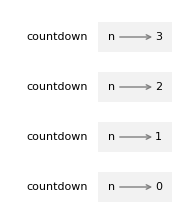

In [37]:
from diagram import diagram, adjust


width, height, x, y = [1.74, 2.04, 1.05, 1.77]
ax = diagram(width, height)
bbox = stack.draw(ax, x, y)
# adjust(x, y, bbox)

4个`countdown`帧有不同的参数`n`。栈底`n=0`的帧称作**基准条件base case**。它不进行递归调用，因此在下方没有更多的帧。

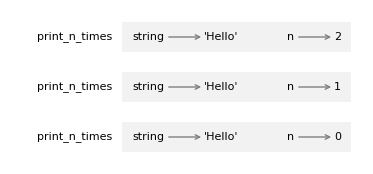

In [40]:
from diagram import make_frame, Stack
from diagram import diagram, adjust

frames = []
for n in [2,1,0]:
    d = dict(string='Hello', n=n)
    frame = make_frame(d, name='print_n_times', dx=1.3, loc='left')
    frames.append(frame)

stack = Stack(frames, dy=-0.5)

width, height, x, y = [3.53, 1.54, 1.54, 1.27]
ax = diagram(width, height)
bbox = stack.draw(ax, x, y)
# adjust(x, y, bbox)

## 无限递归

如果一个递归始终无法到达基准条件，它将永远进行递归调用，程序永远不会终止。这被称为**无限递归infinite recursion**，通常这不是一个好主意。以下是一个无限递归的例子。

In [41]:
def recurse():
    recurse()

每当调用`recurse`时，它会调用自身，创建另一个帧。在Python中，同时能够堆叠的帧数是有限的。如果程序超过这个限制，将导致运行时错误。

In [42]:
%xmode Context

Exception reporting mode: Context


In [43]:
%%expect RecursionError

recurse()

RecursionError: maximum recursion depth exceeded

回溯信息表明当错误发生时，栈中大约有3000个帧。

如果你偶然遇到了无限递归，检查你的函数，确保存在基准条件，不进行递归调用。如果确实有基准条件，检查你是否保证能够到达该条件。

## 键盘输入

我们目前编写的程序不支持来自用户的输入。它们每次执行相同的动作。

Python提供内建的函数`input`，暂停程序并等待用户输入。当用户按下*Return*或*Enter*，程序会继续，`input`函数会将用户的输入作为字符串进行返回。

In [44]:
text = input()

在从用户获取输入之前，你可能想要显示一个提示词，告诉用户输入什么。`input`可以接受一个提示词作为参数：

In [46]:
name = input('你的名字是?\n')
name

'abc'

提示词末尾的`\n`代表一个换行符**newline**，是导致换行的特殊字符，这会导致用户的输入在提示词的下方。

译注：在Python默认解释器中可以正常显示input函数的换行符；在Jupyter notebook中，可能无法正常显示。

如果你想要用户输入整数，你可以使用`int`函数将返回的值转化为int类型。

In [52]:
prompt = '声音在空气中的速度是多少m/s?\n'
speed = input(prompt)
speed

'三百四十'

注意如果输入的内容无法被转化为整数，你会遇到运行时错误。

In [48]:
%xmode Minimal

Exception reporting mode: Minimal


In [53]:
%%expect ValueError

int(speed)

ValueError: invalid literal for int() with base 10: '三百四十'

稍后我们会看到如何处理这种错误。

## 调试

如果出现了语法错误或者运行时错误，错误信息将包含许多信息，但也可能太多了。最有用的部分通常是：

- 它是哪种错误
- 它出现的位置

语法错误通常更容易找到，但也有一些陷阱。与空格和制表符相关的错误可能比较棘手，因为它们是隐形的，我们通常会无视。

In [54]:
%%expect IndentationError
x = 5
 y = 6

IndentationError: unexpected indent (2365500740.py, line 2)

在这个例子里，问题在于第二行以一个空格缩进。但错误信息指向`y`，导致了误解。错误信息会指出发现问题的位置，但实际出错的位置可能在前面一段代码中。

这个问题对运行时错误也会出现。例如，假设你想将比率转化为分贝：

In [55]:
%xmode Context

Exception reporting mode: Context


In [56]:
%%expect ValueError
import math
numerator = 9
denominator = 10
ratio = numerator // denominator
decibels = 10 * math.log10(ratio)

ValueError: math domain error

错误信息指出问题在第5行，但这一行没有错误。实际错误出现在第4行，使用整数除法而非浮点数除法，导致`ratio`的值为0。当调用`math.log10`时，将产生`ValueError`，告诉我们`math domain error`，因为0不在`math.log10`的定义域中，0的对数未定义。

总体而言，你需要花时间仔细阅读错误信息，但别认为所有的信息都完全正确。

## 术语表
- **递归recursion**：调用正在执行的函数自身的过程；
- **求模运算符modulus operator**：`%`运算符，在两个整数上进行运算，返回两个数除法的余数；
- **布尔表达式boolean expression**：值为`True`或`False`的表达式；
- **关系运算符relational operator**：比较两个运算对象的运算符，包括`==`, `!=`, `>`, `<`, `>=`,和`<=`；
- **逻辑运算符logical operator**：结合布尔表达式的运算符，包括`and`, `or`,和`not`；
- **条件语句conditional statement**：根据某些条件来控制程序执行流程的语句；
- **条件condition**：条件语句中的布尔表达式，决定执行哪个分支；
The boolean expression in a conditional statement that determines which branch runs.
- **块block**：缩进一致的若干语句，表明它们是其他语句的一部分；
- **分支branch**：条件语句中可能执行的若干语句块之一；
- **链式条件语句chained conditional**：有一系列分支的条件语句；
- **嵌套条件语句nested conditional**：出现在另一个条件语句的分支中的条件语句；
- **递归的recursive**：调用自身的函数是递归的；
- **基准条件base case**：递归函数中不进行递归调用的条件分支；
- **无限递归infinite recursion**：不包含基准条件，或者永远无法到达基准条件的递归。无限递归将导致运行时错误；
- **换行符newline**：在两部分字符串之间进行换行的字符。

## 练习

In [56]:
# 这个单元格让Jupyter在出现运行时故障时提供更多调试信息。
# 在进行练习前先运行本单元格。

%xmode Verbose

Exception reporting mode: Verbose


### 询问虚拟助手

- 询问虚拟助手：“求模运算符的用途有哪些？”
- Python提供`and`, `or`,和`not`运算符以计算逻辑运算，但没有提供计算异或的运算符(exclusive or,xor)。询问虚拟助手：“xor逻辑运算符是什么？如何在Python中计算它？”

本章我们看到了对于3个分支的两种`if`语句写法，即链式条件语句和嵌套条件语句。使用虚拟助手将其中一种转化为另一种。例如，询问虚拟助手：“将以下语句转化为链式条件语句”。

In [57]:
x = 5
y = 7

In [58]:
if x == y:
    print('x等于y')
else:
    if x < y:
        print('x小于y')
    else:
        print('x大于y')

x小于y


询问虚拟助手：“将以下语句转化为单个条件语句。”

In [59]:
if 0 < x:
    if x < 10:
        print('x是正的个位数。')

x是正的个位数。


看看虚拟助手能否简化以下不必要的语法：

In [60]:
if not x <= 0 and not x >= 10:
    print('x是正的个位数。')

x是正的个位数。


以下是隔两个数字进行倒数的递归函数。

In [61]:
def countdown_by_two(n):
    if n == 0:
        print('发射!')
    else:
        print(n)
        countdown_by_two(n-2)

看上去它能够正常工作：

In [62]:
countdown_by_two(6)

6
4
2
发射!


但这个函数存在错误。询问虚拟助手错误在哪，如何修复。将解答粘贴到这里，并进行测试。

### 练习

`time`模块提供了函数`time`，返回从“Unix纪元”(1970年1月1日00:00:00 UTC)至今的秒数。

In [63]:
from time import time

now = time()
now

1736950375.9903634

使用整数除法和求模运算符计算从Unix纪元至今的天数，以及现在时间的小时数，分钟数，秒数。

你可以在官方文档<https://docs.python.org/3/library/time.html>找到更多关于`time`模块的内容。

### 练习

给定3个木棍，可能无法组成三角形。例如，如果一个木棍长度为12英寸，其他两个木棍长度为1英寸，你无法让两个短木棍进行闭合。对于任意3个长度，任意一个边长大于其余边长之和，将无法形成三角形。

编写函数`is_triangle`，接受3个整数，如果能够形成三角形则打印`Yes`，否则打印`No`。提示：使用链式条件语句。

In [ ]:
# 在这编写

使用以下例子进行测试：

In [65]:
is_triangle(4, 5, 6)   # Yes

In [66]:
is_triangle(1, 2, 3)   # Yes

In [67]:
is_triangle(6, 2, 3)   # No

In [68]:
is_triangle(1, 1, 12)   # No

### 练习

先不运行以下程序，猜测程序的输出是什么？手工绘制打印结果时的栈图。

In [ ]:
def recurse(n, s):
    if n == 0:
        print(s)
    else:
        recurse(n-1, n+s)

recurse(3, 0)

### 练习

以下练习将使用第4章介绍的`jupyturtle`。

阅读以下函数，看看你能否明白它的功能。然后运行，检查你的猜测是否正确。

调整`length`, `angle`和`factor`，看看它们如何影响结果。如果你不确定是否理解了函数的功能，询问虚拟助手。

In [64]:
from jupyturtle import forward, left, right, back, make_turtle

def draw(length):
    angle = 50
    factor = 0.6
    
    if length > 5:
        forward(length)
        left(angle)
        draw(factor * length)
        right(2 * angle)
        draw(factor * length)
        left(angle)
        back(length)

In [ ]:
# 在这尝试

### 练习

询问虚拟助手“科赫曲线Koch curve是什么？”

要绘制长度为`x`的科赫曲线，需要：

1. 绘制长度为`x/3`的科赫曲线；
2. 向左转60度；
3. 绘制长度为`x/3`的科赫曲线；
4. 向右转120度；
5. 绘制长度为`x/3`的科赫曲线；
6. 向左旋转60度；
7. 绘制长度为`x/3`的科赫曲线；

当`x`小于5时，直接绘制长度为`x`的线段。

编写函数`koch`，接受参数`x`，绘制给定长度的科赫曲线。

译注：此处科赫曲线的“长度”是指构造科赫曲线的线段长度。对于没有基准条件无限递归的理论科赫曲线，其长度为无穷大。

In [4]:
# 在这定义

结果应该类似：

In [71]:
make_turtle(delay=0)
koch(120)

当koch函数能够正确运行，可以用以下命令绘制科赫雪花：

In [72]:
make_turtle(delay=0, height=300)
for i in range(3):
    koch(120)
    right(120)

### 练习

虚拟助手知道`jupyturtle`模块中的函数，但这些函数有很多版本和不同的名字。所以虚拟助手可能不清楚你的版本。

你可以在提问之前提供额外的信息。例如，你可以用以下提示词：“以下是使用`jupyturtle`模块的一个程序。”将前面相关练习的程序粘贴给虚拟助手。然后虚拟助手应该能够使用这个模块来编写代码。

例如让虚拟助手绘制Sierpiński谢尔宾斯基三角形。你得到的代码可能是良好的开始，但你可能也必须做一些调试。

如果首次尝试失败，你可以告诉虚拟助手发生了什么并寻求帮助，或者自行调试。

In [77]:
# 在这定义

译注:L型曲线逼近方法参考代码如下:

In [65]:
def draw_sierpinski(length,thred,sign=1):
    if length<=thred:
        forward(length)
    else:
        length=length/4
        draw_sierpinski(length,thred,sign)
        left(sign*60)
        draw_sierpinski(length,thred,-sign)
        left(sign*60)
        draw_sierpinski(length,thred,sign)
        right(sign*60)
        draw_sierpinski(length,thred,-sign)
        right(sign*60)
        draw_sierpinski(length,thred,sign)
        right(sign*60)
        draw_sierpinski(length,thred,-sign)
        right(sign*60)
        draw_sierpinski(length,thred,sign)
        left(sign*60)
        draw_sierpinski(length,thred,-sign)
        left(sign*60)
        draw_sierpinski(length,thred,sign)

以下是一个例子，尽管你看到的形式可能不同。

In [66]:
make_turtle(delay=0.01,height=300)

draw_sierpinski(100, 3)

[Think Python: 3rd Edition](https://allendowney.github.io/ThinkPython/index.html)

Copyright 2024 [Allen B. Downey](https://allendowney.com)

Code license: [MIT License](https://mit-license.org/)

Text license: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)